# Funciones iniciales

In [1]:
import os
import subprocess
import platform
import shutil
import urllib.request
import tarfile
import time

def is_java_installed():
    try:
        output = subprocess.check_output(['java', '-version'], stderr=subprocess.STDOUT)
        print(output.decode())
        return True
    except Exception as e:
        print(e)
        return False

if is_java_installed():
    print("Java is installed")
else:
    print("Java is not installed")


def setup_spark_nlp(base_path='C:\\'):
    """
    Sets up Spark NLP with Spark 3.2.3 on Windows.
    :param base_path: base path for installation (optional)
    """
    # Step 1: descargar e installar Adopt OpenJDK 1.8
    # Este paso no puede ser automatizado y debe ser realizado manualmente. 
    
    # Step 2: Descargar pre-compiled Hadoop binaries
    hadoop_bin_url = 'https://github.com/cdarlint/winutils/raw/master/hadoop-3.2.0/bin/'
    hadoop_bin_dir = os.path.join(base_path, 'hadoop', 'bin')
    os.makedirs(hadoop_bin_dir, exist_ok=True)

    for file in ['winutils.exe', 'hadoop.dll']:
        urllib.request.urlretrieve(hadoop_bin_url + file, os.path.join(hadoop_bin_dir, file))

    # Step 3: Descargar Apache Spark 3.2.3

    spark_url = 'https://archive.apache.org/dist/spark/spark-3.2.3/spark-3.2.3-bin-hadoop3.2.tgz'
    spark_dir = os.path.join(base_path, 'spark','spark-3.2.3-bin-hadoop3.2')

    with urllib.request.urlopen(spark_url) as response:
        with open('spark.tgz', 'wb') as f:
            shutil.copyfileobj(response, f)

    with tarfile.open('spark.tgz', 'r:gz') as tf:
        tf.extractall(spark_dir)

    # Step 4: Set environment variables 
    os.environ['HADOOP_HOME'] = os.path.join(base_path, 'hadoop','bin')
    os.environ['SPARK_HOME'] = spark_dir

    # Step 5: Add to PATH environment variable
    os.environ['PATH'] += os.pathsep + os.path.join(os.environ['HADOOP_HOME'], 'bin')
    os.environ['PATH'] += os.pathsep + os.path.join(os.environ['SPARK_HOME'], 'bin')

    # Step 6: Install Microsoft Visual C++ 2010 Redistributed Package (x64)
    # This step cannot be automated and must be done manually.

    # Step 7: Create folders C:\tmp and C:\tmp\hive
    os.makedirs(os.path.join(base_path, 'tmp', 'hive'), exist_ok=True)

    # Change permissions for C:\tmp and C:\tmp\hive
    winutils = os.path.join(os.environ['HADOOP_HOME'], 'bin', 'winutils.exe')
    os.system(f'{winutils} chmod 777 /tmp/hive')
    os.system(f'{winutils} chmod 777 /tmp/')


def setup(pyspark_version="3.2.3", sparknlp_version="4.4.2"):
    """
    Configura el entorno de Google Colab con PySpark y Spark NLP.
    :param pyspark_version: versión de PySpark a instalar (opcional)
    :param sparknlp_version: versión de Spark NLP a instalar (opcional)
    """
    if 'dbutils' in globals():
        print("Este notebook se está ejecutando en Databricks, sigue los siguientes pasos para configurarlo si no lo has hecho ya") 
        data = [["Paso", "Descripción"],
        ["1", "Configurar `spark.kryoserializer.buffer.max` a `2000M` y `spark.serializer` a `org.apache.spark.serializer.KryoSerializer`"],
        ["2", "En la pestaña de Bibliotecas dentro de tu clúster, sigue estos pasos:"],
        ["3.1", "Instalar nuevo -> PyPI -> spark-nlp -> Instalar"],
        ["3.2", "Instalar nuevo -> Maven -> Coordenadas -> com.johnsnowlabs.nlp:spark-nlp_2.12:4.4.3"]]
        for row in data:
            print("{: <5} {: <10}".format(*row))
        return
    elif platform.system() == 'Linux':
        os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
        print(f"Instalando PySpark {pyspark_version} y Spark NLP {sparknlp_version}")
        if 'NVIDIA' in subprocess.getoutput('nvidia-smi'):
            print("Actualizando libcudnn8 a 8.1.0 para GPU")
            !apt install -qq --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2 -y &> /dev/null
        !pip install --upgrade -q pyspark==$pyspark_version spark-nlp==$sparknlp_version findspark

    elif platform.system() == 'Windows':
        print(f"Instalando PySpark {pyspark_version} y Spark NLP {sparknlp_version}")
        !pip install --upgrade -q pyspark==$pyspark_version spark-nlp==$sparknlp_version findspark
        !pip install numpy
        !pip install -qq watermark awscli
        !pip install torch==2.0.0+cu118 torchvision==0.15.1+cu118 torchaudio==2.0.1 --index-url https://download.pytorch.org/whl/cu118
        !conda install -c anaconda scikit-learn -y
        # SOLO EJECUTAR 1 VEZ 
        # !conda install numpy torch 
        setup_spark_nlp()

# setup()

java version "1.8.0_371"
Java(TM) SE Runtime Environment (build 1.8.0_371-b11)
Java HotSpot(TM) 64-Bit Server VM (build 25.371-b11, mixed mode)

Java is installed


In [2]:


# [Environment]::SetEnvironmentVariable("HADOOP_HOME", "C:\Users\RomanGu\OneDrive - BASF\Documents\CODE\romangu-repo\notebooks\TFM\experimentos\ARCHIVOS_BASE\hadoop\bin", "User")
# [Environment]::SetEnvironmentVariable("SPARK_HOME", "C:\Users\RomanGu\OneDrive - BASF\Documents\CODE\romangu-repo\notebooks\TFM\experimentos\ARCHIVOS_BASE\ARCHIVOS_BASE\spark\spark-3.2.3-bin-hadoop3.2\bin", "User")


# $CurrentValue = [Environment]::GetEnvironmentVariable("PATH", "User")
# [Environment]::SetEnvironmentVariable("PATH", $CurrentValue + ";C:\Users\RomanGu\OneDrive - BASF\Documents\CODE\romangu-repo\notebooks\TFM\experimentos\ARCHIVOS_BASE\hadoop\bin", "User")

# $CurrentValue = [Environment]::GetEnvironmentVariable("PATH", "User")
# [Environment]::SetEnvironmentVariable("PATH", $CurrentValue + ";C:\Users\RomanGu\OneDrive - BASF\Documents\CODE\romangu-repo\notebooks\TFM\experimentos\ARCHIVOS_BASE\spark\spark-3.2.3-bin-hadoop3.2\bin", "User")



In [3]:
# os.environ["HADOOP_HOME"] = r"C:\Users\RomanGu\OneDrive - BASF\Documents\CODE\romangu-repo\notebooks\TFM\experimentos\ARCHIVOS_BASE\hadoop\bin"


# os.environ["SPARK_HOME"] = r"C:\Users\RomanGu\OneDrive - BASF\Documents\CODE\romangu-repo\notebooks\TFM\experimentos\ARCHIVOS_BASE\ARCHIVOS_BASE\spark\spark-3.2.3-bin-hadoop3.2\bin"



# # Add to PATH environment variable
# os.environ['PATH'] += os.pathsep + os.path.join(os.environ['HADOOP_HOME'])
# os.environ['PATH'] += os.pathsep + os.path.join(os.environ['SPARK_HOME'])

# %%cmd
# setx PATH %PATH%;"C:\Users\RomanGu\OneDrive - BASF\Documents\CODE\romangu-repo\notebooks\TFM\experimentos\ARCHIVOS_BASE\hadoop\bin"
# setx HADOOP_HOME "C:\Users\RomanGu\OneDrive - BASF\Documents\CODE\romangu-repo\notebooks\TFM\experimentos\ARCHIVOS_BASE\hadoop\bin"
# setx PATH %PATH%;"C:\Users\RomanGu\OneDrive - BASF\Documents\CODE\romangu-repo\notebooks\TFM\experimentos\ARCHIVOS_BASE\spark\spark-3.2.3-bin-hadoop3.2\bin"
# setx SPARK_HOME  "C:\Users\RomanGu\OneDrive - BASF\Documents\CODE\romangu-repo\notebooks\TFM\experimentos\ARCHIVOS_BASE\spark\spark-3.2.3-bin-hadoop3.2\bin"
# abrir enviroment variables desde powershell: & "$env:SystemRoot\System32\SystemPropertiesAdvanced.exe"

for environ in ["HADOOP_HOME","SPARK_HOME","JAVA_HOME"]:
    try:
        print(environ,os.environ[environ])
    except:
        print(environ, "no está configurada")


HADOOP_HOME C:\hadoop
SPARK_HOME C:\spark\spark-3.2.3-bin-hadoop3.2
JAVA_HOME C:\Java\Java\jdk1.8.0_231


In [4]:
import sparknlp
import torch
from pyspark.sql import SparkSession
if 'dbutils' not in globals():
    # spark = sparknlp.start(gpu = torch.cuda.is_available())
    spark = (SparkSession.builder
             .appName('TFM Spark NLP - GPU')
             .master('local[*]')
             .config('spark.driver.memory', '20G')
             .config('spark.serializer', 'org.apache.spark.serializer.KryoSerializer')
             .config('spark.kryoserializer.buffer.max', '2000M')
             .config('spark.jars.packages', 'com.johnsnowlabs.nlp:spark-nlp-gpu_2.12:4.3.2')
             .config('spark.jars.repositories', 'https://repo1.maven.org/maven2')
            #  .config('spark.executor.resource.gpu.amount', 1)
            #  .config('spark.task.resource.gpu.amount', 1)
             .getOrCreate())

print("Spark NLP version: {}".format(sparknlp.version()))
print("Apache Spark version: {}".format(spark.version))
print("Is cuda available: ",torch.cuda.is_available())


Spark NLP version: 4.4.2
Apache Spark version: 3.2.3
Is cuda available:  True


In [5]:
spark.sparkContext

<SparkContext master=local[*] appName=TFM Spark NLP - GPU>

In [6]:
%reload_ext watermark
%watermark -v -p numpy,pandas,torch,transformers,sklearn

Python implementation: CPython
Python version       : 3.10.11
IPython version      : 8.13.2

numpy       : 1.24.3
pandas      : 2.0.1
torch       : 2.0.0+cu118
transformers: not installed
sklearn     : 0.0.post5



In [7]:
# Importing necessary libraries
from sparknlp.pretrained import PretrainedPipeline
# from sparknlp.base import LightPipeline,document_assembler
from sparknlp.base import *
from sparknlp.annotator import *
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
from pyspark.sql.functions import countDistinct, col
import pyspark.sql.functions as F
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

# Setting up inline plotting and figure format
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Setting up seaborn style and color palette
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

# Setting up figure size for plots
rcParams['figure.figsize'] = 12, 8


In [8]:
def experimento(tipo: str, idioma: str):
    """
    Configura y devuelve los parámetros para un experimento.

    Parámetros
    ----------
    tipo : str
        El tipo de experimento a realizar. Debe ser "AMAZON" o "AGNEWS".
    idioma : str
        El idioma del modelo pre-entrenado a utilizar. Debe ser "EN" o "ES".

    Devoluciones
    -------
    int
        El tamaño del lote a utilizar en el experimento.
    int
        El número de épocas a utilizar en el experimento.
    float
        La tasa de aprendizaje a utilizar en el experimento.
    str
        El nombre del modelo pre-entrenado a utilizar en el experimento.

    """
    
    experiment_params = {
         "AMAZON": (16,2,1e-5),
        # "AMAZON": (16,5,1e-5), # demasiado 5 epochs, casi 6h de entrenamiento. con 2 se consigue casi lo mismo. 
        # "AMAZON":(16, 4, 2e-5),
        # "AMAZON": (16, 2, 5e-5),
        "AGNEWS": (32, 4, 3e-5) 
    }
    
    model_names = {
        "ES": 'bert_base_cased', # https://sparknlp.org/2021/09/07/bert_base_cased_es.html
        "EN": 'small_bert_L4_256',# https://sparknlp.org/2020/08/25/small_bert_L4_256.html
    }
    
    if tipo.upper() not in experiment_params:
        print("elige experimento")
        return
    
    if idioma.upper() not in model_names:
        print("modelo no elegido")
        return
    
    BATCH_SIZE, EPOCHS, LEARNING_RATE = experiment_params[tipo.upper()]
    PRE_TRAINED_MODEL_NAME = model_names[idioma.upper()]
    
    return  BATCH_SIZE, EPOCHS, LEARNING_RATE, PRE_TRAINED_MODEL_NAME, tipo, idioma

BATCH_SIZE, EPOCHS, LEARNING_RATE, PRE_TRAINED_MODEL_NAME, tipo, idioma = experimento(tipo = "AGNEWS", idioma ="en")

# En spark NLP - tamaños para los BERT models

Modelos elegidos:
* Para el modelo de respuesta en inglés [bert_uncased_L-4_H-256_A-4_squad2](https://sparknlp.org/2022/06/02/bert_qa_bert_uncased_L_4_H_256_A_4_squad2_en_3_0.html) 
  * el más parecido a [google/bert_uncased_L-4_H-256_A-4](https://huggingface.co/google/bert_uncased_L-4_H-256_A-4)
* para el modelo de clasificación en español si está el mismo modelo de HugginFace  [bert_base_multilingual_cased](https://sparknlp.org/2021/05/20/bert_base_multilingual_cased_xx.html)

<!-- Original values
* PRE_TRAINED_MODEL_NAME = 'bert_base_cased'  **389.1 MB**
* PRE_TRAINED_MODEL_NAME = 'sent_small_bert_L8_512' **149.1 MB**
* PRE_TRAINED_MODEL_NAME = 'small_bert_L4_256' **40.5 MB**

Para sentence embeddings.
SENTENCE_PRE_TRAINED_MODEL_NAME = 'sent_bert_base_cased'
SENTENCE_PRE_TRAINED_MODEL_NAME = 'sent_small_bert_L8_512' **149.1 MB** -->

Fuente: [NLP MODELS EN SPARK-NLP](https://nlp.johnsnowlabs.com/models)

In [9]:
# Para las Sentence embeddings el nombre del moldelo lleva un prefijo "sent_"
SENTENCE_PRE_TRAINED_MODEL_NAME = 'sent_'+PRE_TRAINED_MODEL_NAME

# Random Seed 
RANDOM_SEED = 42


print(f"BATCH_SIZE: {BATCH_SIZE}")
print(f"LEARNING_RATE: {LEARNING_RATE}")
print(f"EPOCHS: {EPOCHS}")
print(f"PRE_TRAINED_MODEL_NAME: {PRE_TRAINED_MODEL_NAME}")
print(f"PRE_TRAINED_MODEL_NAME FOR SENTENCES: {SENTENCE_PRE_TRAINED_MODEL_NAME}")
print(f"DATASET: {tipo}")
print(f"Idioma: {idioma}")

BATCH_SIZE: 32
LEARNING_RATE: 3e-05
EPOCHS: 4
PRE_TRAINED_MODEL_NAME: small_bert_L4_256
PRE_TRAINED_MODEL_NAME FOR SENTENCES: sent_small_bert_L4_256
DATASET: AGNEWS
Idioma: en


In [10]:
!pip install awscli -qq

import subprocess
import os
import platform

if 'dbutils' in globals():
    root_folder = os.path.join("/dbfs/mnt/edl/data/testing/trs_test","sample_data/")
else:
    root_folder = "./sample_data/"
print(root_folder)





def download_files(root_folder,tipo):
    """
    Descarga los archivos dataset_es_test.json y dataset_es_train.json desde Amazon S3.
    :param root_folder: ruta de la carpeta donde se guardarán los archivos descargados
    """
    if tipo.upper() == 'AGNEWS':
        
        if not os.path.isfile(os.path.join(root_folder,'news_category_train.csv')):
            print("descargando train en",root_folder)
            subprocess.run(f"wget https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Public/data/news_category_train.csv -P  {root_folder} -q")
        if not os.path.isfile(os.path.join(root_folder,'news_category_test.csv')):
            print("descargando test en",root_folder)
            subprocess.run(f"wget https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Public/data/news_category_test.csv -P {root_folder} -q")
    else:
        if not os.path.isfile(os.path.join(root_folder,'dataset_es_test.json')):
            print("descargando test en",root_folder)
            subprocess.run(f"aws s3 cp s3://amazon-reviews-ml/json/test/dataset_es_test.json {root_folder} --no-sign-request", shell=True)
    
        if not os.path.isfile(os.path.join(root_folder,'dataset_es_train.json')):
            print("descargando train en",root_folder)
            subprocess.run(f"aws s3 cp s3://amazon-reviews-ml/json/train/dataset_es_train.json {root_folder} --no-sign-request", shell=True)

download_files(root_folder,tipo)

./sample_data/


In [11]:
if 'dbutils' in globals():
    spark.createDataFrame(dbutils.fs.ls(root_folder.lstrip("/dbfs"))).show(truncate=False)
else:
    print(os.listdir(root_folder))

['dataset_es_test.json', 'dataset_es_train.json', 'news_category_test.csv', 'news_category_train.csv']


In [12]:
if tipo.upper() == 'AGNEWS':
    # para AGNEWS
    traindata = os.path.join(root_folder, "news_category_train.csv")
    testdata = os.path.join(root_folder, "news_category_test.csv") 
    if 'dbutils' in globals():
        traindata = traindata.replace("/dbfs","")
        testdata = testdata.replace("/dbfs","")

else:
    # para amazon    
    traindata = os.path.join(root_folder, "dataset_es_train.json")
    testdata = os.path.join(root_folder, "dataset_es_test.json") 
    if 'dbutils' in globals():
        traindata = traindata.replace("/dbfs","")
        testdata = testdata.replace("/dbfs","")
print(traindata)
print(testdata)

./sample_data/news_category_train.csv
./sample_data/news_category_test.csv


In [13]:
if 'dbutils' in globals():
    !head /dbfs{traindata}
elif platform.system() == 'Linux':
    !head {traindata}
else:
    !powershell -command "gc {traindata} | select -first 10 # head"

category,description
Business," Short sellers, Wall Street's dwindling band of ultra cynics, are seeing green again."
Business," Private investment firm Carlyle Group, which has a reputation for making well timed and occasionally controversial plays in the defense industry, has quietly placed its bets on another part of the market."
Business, Soaring crude prices plus worries about the economy and the outlook for earnings are expected to hang over the stock market next week during the depth of the summer doldrums.
Business," Authorities have halted oil export flows from the main pipeline in southern Iraq after intelligence showed a rebel militia could strike infrastructure, an oil official said on Saturday."
Business," Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections."
Business," Stocks ended slightly higher on Friday but stayed near lows for the year as oil prices surged past  #36;

In [14]:
from pyspark.sql.functions import col, when
from pyspark.sql import SparkSession

if tipo.upper() == 'AGNEWS':
    df = spark.read.option("header", True).csv(traindata,mode="DROPMALFORMED")
    df_testdata = spark.read.option("header", True).csv(testdata,mode="DROPMALFORMED")
else:        
    df = spark.read.json(traindata).select(
        col("stars"), col("review_body").alias("description")
    )
    df_testdata = spark.read.json(testdata).select(
        col("stars"), col("review_body").alias("description")
    )

print(
    "Tamaño total ", df.count(), len(df.columns)
)  # dataframe shape only exists in recent versions

df.show(10, truncate=False)

Tamaño total  120000 2
+--------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|category|description                                                                                                                                                                                                  |
+--------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Business| Short sellers, Wall Street's dwindling band of ultra cynics, are seeing green again.                                                                                                                        |
|Business| Private investment firm Carlyle Group, which has a reputation for making well timed and occasional

# Creando las categorías del sentiment en base al numero de estrellas:
Este fragmento de código crea una nueva columna llamada "sentiment" en dos DataFrames `df` y `df_testdata`. La columna "sentiment" se llena con valores basados en la columna "stars" de cada DataFrame.

Para cada fila en el DataFrame `df`, si el valor en la columna "stars" está entre 0 y 2 (exclusivo), el valor correspondiente en la columna "sentiment" se establece en "negative". Si el valor en la columna "stars" es igual a 3, el valor correspondiente en la columna "sentiment" se establece en "neutral". Para todos los demás valores en la columna "stars", el valor correspondiente en la columna "sentiment" se establece en "positive".

El mismo proceso se aplica al DataFrame `df_testdata`.

Esto se logra utilizando la función `when` de spark, que toma una lista de condiciones y una lista de valores a seleccionar cuando se cumple cada condición. Si ninguna de las condiciones se cumple para un elemento dado, se selecciona el valor especificado por el parámetro `otherwise`.

In [15]:
from pyspark.ml.feature import StringIndexer
if tipo.upper() == 'AGNEWS':
    # Codificar las etiquetas categóricas como números enteros
    label_indexer = StringIndexer(inputCol="category", outputCol="label").fit(df)
    df = label_indexer.transform(df)
    df_testdata = label_indexer.transform(df_testdata)

else: 
    # me creo categorias porque para Amazon hay hasta 6 estrellas, de diversos grados, es mejor reducir
    df = df.withColumn(
        "sentiment",
        when(df["stars"].between(0, 2), "negative")
        .when(df["stars"] == 3, "neutral")
        .otherwise("positive")
    )

    df_testdata = df_testdata.withColumn(
        "sentiment",
        when(df_testdata["stars"].between(0, 2), "negative")
        .when(df_testdata["stars"] == 3, "neutral")
        .otherwise("positive")
    )
    indexer = StringIndexer(inputCol="sentiment", outputCol="category_encoded")
    indexer_model = indexer.fit(df)
    df = indexer_model.transform(df)
    df_testdata = indexer_model.transform(df_testdata)

df_testdata.show(10,truncate=90)


+--------+------------------------------------------------------------------------------------------+-----+
|category|                                                                               description|label|
+--------+------------------------------------------------------------------------------------------+-----+
|Business|Unions representing workers at Turner   Newall say they are 'disappointed' after talks ...|  0.0|
|Sci/Tech| TORONTO, Canada    A second team of rocketeers competing for the  #36;10 million Ansar...|  1.0|
|Sci/Tech| A company founded by a chemistry researcher at the University of Louisville won a gran...|  1.0|
|Sci/Tech| It's barely dawn when Mike Fitzpatrick starts his shift with a blur of colorful maps, ...|  1.0|
|Sci/Tech| Southern California's smog fighting agency went after emissions of the bovine variety ...|  1.0|
|Sci/Tech|\\FOAF/LOAF  and bloom filters have a lot of interesting properties for social\network ...|  1.0|
|Sci/Tech|     "Wiltshire Po

In [16]:
# # igualamos el numero de ocurrencias por categoria para no tener bias.
# df_temp = df.filter(col("sentiment") == "negative").limit(40000) \
#     .union(df.filter(col("sentiment") == "neutral").limit(40000)) \
#     .union(df.filter(col("sentiment") == "positive").limit(40000))

# df_testdata_temp = df_testdata.filter(col("sentiment") == "negative").limit(1000) \
#     .union(df_testdata.filter(col("sentiment") == "neutral").limit(1000)) \
#     .union(df_testdata.filter(col("sentiment") == "positive").limit(1000))

# # reemplazamos los dataset uno con los datos, df para train y val, y df_testdata para la prueba "test"
# df = df_temp
# df_testdata = df_testdata_temp



def balance_df(df, category_col):
    # Obtener el número mínimo de registros por categoría
    min_count = df.groupBy(category_col).count().select("count").agg({"count": "min"}).collect()[0][0]
    
    # Crear una lista vacía para almacenar los dataframes por categoría
    dfs = []
    
    # Iterar sobre cada categoría y obtener un sub-dataframe con el número mínimo de registros
    for category in df.select(category_col).distinct().collect():
        category_df = df.filter(col(category_col) == category[category_col]).limit(min_count)
        dfs.append(category_df)
    
    # Unir todos los dataframes por categoría en un solo dataframe
    balanced_df = dfs[0]
    for df in dfs[1:]:
        balanced_df = balanced_df.union(df)
    
    return balanced_df

if tipo.upper() == 'AGNEWS':
    col_categoria = "category"
else:
    col_categoria = "sentiment"

df = balance_df(df, col_categoria)
df_testdata = balance_df(df_testdata, col_categoria)


df.groupBy(col_categoria).count().filter(col("count") > 1).show()

+--------+-----+
|category|count|
+--------+-----+
|   World|30000|
|Sci/Tech|30000|
|  Sports|30000|
|Business|30000|
+--------+-----+



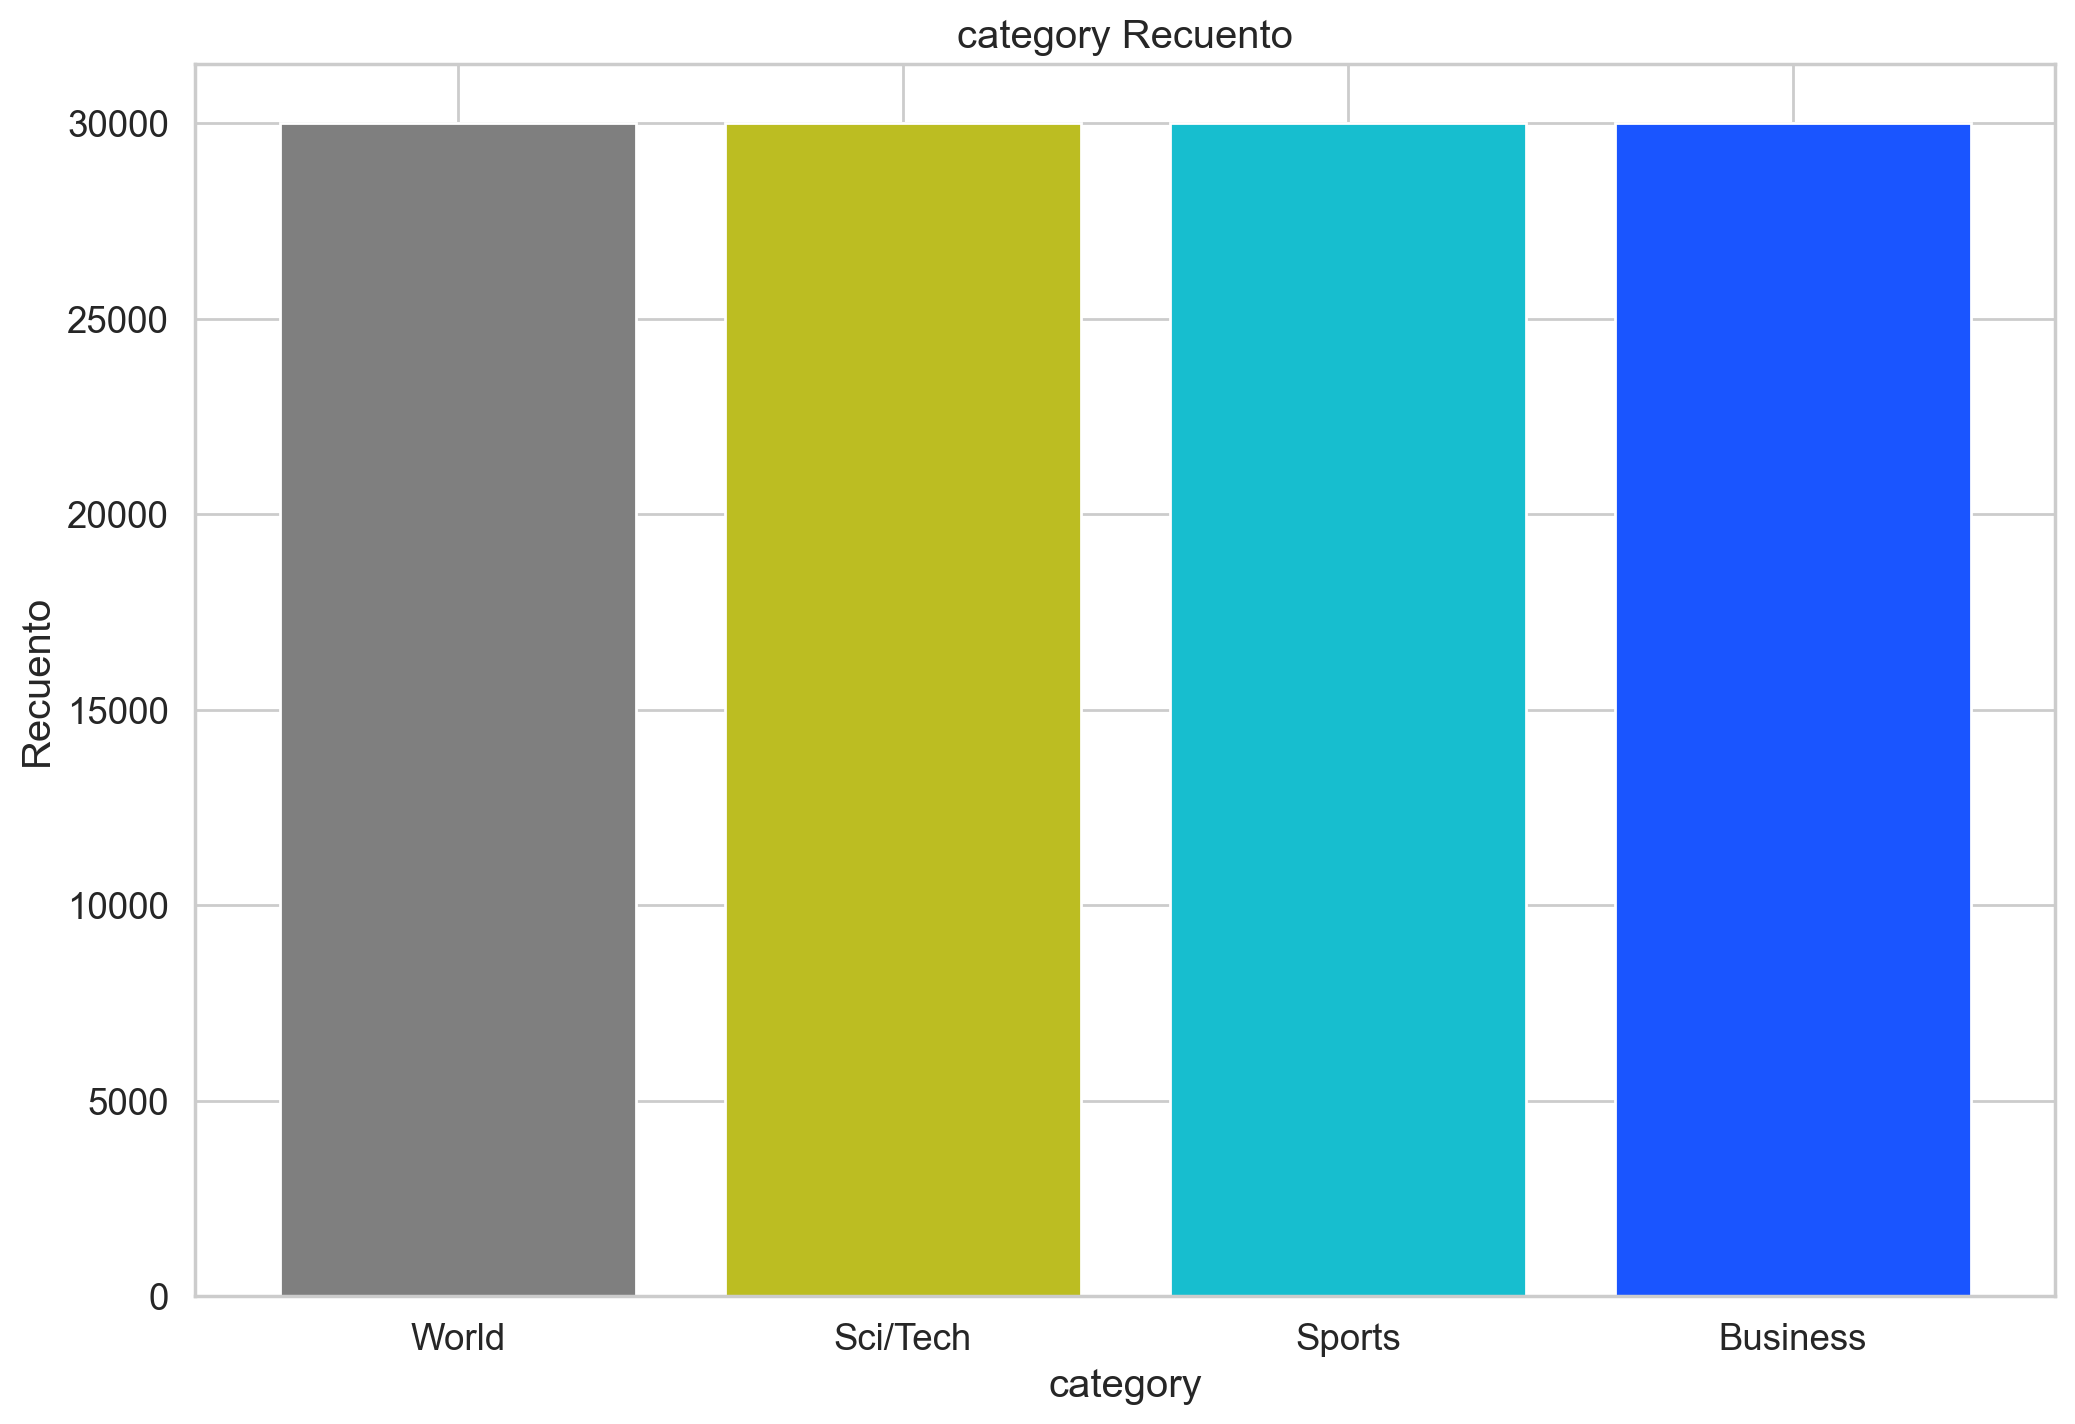

In [17]:
import matplotlib.pyplot as plt

sentiment_counts = df.groupBy(col_categoria).count().toPandas()

colors = [ "#7f7f7f", "#bcbd22", "#17becf", "#1a55FF", "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", ]

plt.bar(sentiment_counts[col_categoria], sentiment_counts["count"],color = colors)
plt.xlabel(col_categoria)
plt.ylabel("Recuento")
plt.title(f"{col_categoria} Recuento")
plt.show()

Explicación del naming en los modelos Bert de Spark NLP. 
* "L" indica qué capa de agrupación (pooling layer) se utiliza al producir las incrustaciones (embeddings) 
* "H" significa la dimensión de las embeddings devueltas.

Por ejemplo, si utilizamos `BertSentenceEmbeddings` con el valor `'sent_small_bert_L8_512'` significa que simplemente cargamos Bert Sentence Embeddings Small con dimensión L8 y 512 y lo usamos en lugar de USE. Como puede ver, es casi 8 veces más pequeño que el tamaño de USE con el poder de Bert.

El modelo se puede utilizar de manera offline si se desea, pero habría que descargarlo previamente. Para no incrementar el tamaño del repositorio dejamos a SPARK_NLP que lo baje automáticamente.


En el contexto del Procesamiento del Lenguaje Natural (NLP), USE significa **Universal Sentence Encoder**. Es una herramienta desarrollada por Google que convierte una cadena de palabras en vectores de 512 dimensiones. Estos vectores capturan el significado semántico de la secuencia de palabras en una oración y, por lo tanto, pueden usarse como entradas para otras tareas de NLP posteriores, como clasificación, medición de similitud semántica, etc .

A continuación se está construyendo un pipeline de procesamiento de Spark NLP. Primero, se está creando un `DocumentAssembler` para convertir la columna "review_body" en un documento y almacenarlo en la columna "document". Luego, se está creando un `Tokenizer` para dividir el documento en tokens y almacenarlos en la columna "token".

Después, se está utilizando `BertEmbeddings` para crear incrustaciones (embeddings) de palabras utilizando un modelo pre-entrenado especificado por `PRE_TRAINED_MODEL_NAME`. Estas incrustaciones se almacenan en la columna "embeddings".

A continuación, se está utilizando `SentenceEmbeddings` para calcular las incrustaciones de oraciones a partir de las incrustaciones de palabras utilizando un promedio y almacenarlas en la columna "sentence_embeddings".

Finalmente, se está creando un clasificador `ClassifierDLApproach` que utiliza las incrustaciones de oraciones como entrada para clasificar el sentimiento del texto. El clasificador se entrena durante un número especificado de épocas con una tasa de aprendizaje y tamaño de lote especificados.

Todo el pipeline se construye utilizando estas etapas y se almacena en la variable `bert_clf_pipeline`.

In [18]:
languaje='en'
if idioma.upper() == "ES":
    # se configura el tokenizador/embebedor en multiidioma 
    languaje='xx'
print(f"idioma {languaje}")

idioma en


In [19]:
document_assembler = DocumentAssembler() \
    .setInputCol("description") \
    .setOutputCol("document")
    
tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token") \
    .setMaxLength(80)

# BertEmbeddings utiliza los datos de una red neuronal entrenada previamente (el nombre del modelo) para crear codificar las palabras que contiene cada texto 
# convirtiendo a vectores dichas palabras. (codificandolas) AQUI USE AL PRINCIPIO 'small_bert_L4_256'
bert_embeddings = BertEmbeddings().pretrained(name=PRE_TRAINED_MODEL_NAME, lang=languaje) \
    .setInputCols(["document",'token'])\
    .setOutputCol("embeddings")
#
embeddingsSentence = SentenceEmbeddings() \
    .setInputCols(["document", "embeddings"]) \
    .setOutputCol("sentence_embeddings") \
    .setPoolingStrategy("AVERAGE")
# ClassifierDLApproach: ClassifierDL Utiliza el State-of-the-art de las Universal Sentence Encoder como input para iniciar clasificaciones de texto.
# es un clasificador que contiene casi 100 clases de tensorflow, usa modelos de deep learning DNN
# LR 5e-3f BATCHSIZE 8
classsifierdl = ClassifierDLApproach()\
    .setInputCols(["sentence_embeddings"])\
    .setOutputCol("class")\
    .setLabelColumn(col_categoria)\
    .setMaxEpochs(EPOCHS)\
    .setLr(LEARNING_RATE)\
    .setBatchSize(BATCH_SIZE)\
    .setEnableOutputLogs(True)
    #.setOutputLogsPath('logs')

bert_clf_pipeline = Pipeline(stages=[
    document_assembler, 
    tokenizer,
    bert_embeddings,
    embeddingsSentence,
    classsifierdl
])

small_bert_L4_256 download started this may take some time.
Approximate size to download 40,5 MB
[OK!]


# Creación del train y val datasets

HAY QUE HACER ONE HOT ENCODING PARA PODER METERLO EN EL BERT

In [20]:
df_train, df_eval = df.randomSplit([0.7, 0.3], seed=RANDOM_SEED)
for dataset in (df_train, df_eval):
  print(dataset.count())

82158
34961


# Ajuste del modelo (FIT)

In [21]:
%%time
inicio = time.time()
bert_Model = bert_clf_pipeline.fit(df_train)
fin = time.time() - inicio 

CPU times: total: 62.5 ms
Wall time: 4min 32s


In [22]:
import os
import shutil
import datetime
from pyspark.ml.pipeline import PipelineModel

def guardar_modelo(tipo, idioma, modelo: PipelineModel):
    """
    Guarda el modelo en la ruta especificada.

    Args:
    modelo: modelo a guardar.
    ruta_guardado: ruta donde se guardará el modelo.
    nombre_especifico: nombre específico para el archivo del modelo guardado.
    """
    ruta_guardado = '../resultados/modelos/'
    # Crear la carpeta si no existe
    carpeta_guardado = os.path.dirname(ruta_guardado)
    if not os.path.exists(carpeta_guardado):
        os.makedirs(carpeta_guardado)
    
    fecha_actual = datetime.datetime.now().strftime(r"%Y-%m-%d_%H-%M-%S")
    nombre_archivo = f"{fecha_actual}_{tipo}_bert_model_state_{idioma}_sparknlp.bin"

    # Unir la ruta de la carpeta con el nombre del archivo
    ruta_archivo = os.path.join(ruta_guardado, nombre_archivo)
    modelo.save(ruta_archivo)
    print(f"modelo guardado en {ruta_archivo}")


guardar_modelo(tipo, idioma, bert_Model )


modelo guardado en ../resultados/modelos/2023-05-28_15-40-30_AGNEWS_bert_model_state_en_sparknlp.bin


In [23]:
import pandas as pd
def guardar_metadata(BATCH_SIZE, EPOCHS, LEARNING_RATE, PRE_TRAINED_MODEL_NAME, tipo, idioma, train_acc:torch.tensor, val_acc:torch.tensor, fin):
    # donde se guardan por defecto
    ruta_guardado = '../resultados/notas/'
    ruta_guardado = os.path.dirname(ruta_guardado)    
    
    if not os.path.exists(ruta_guardado):
        os.makedirs(ruta_guardado)
    metadata = {
        "BATCH_SIZE": [BATCH_SIZE],
        "EPOCHS": [EPOCHS],
        "LEARNING_RATE": [LEARNING_RATE],
        "PRE_TRAINED_MODEL_NAME": [PRE_TRAINED_MODEL_NAME],
        "tipo": [tipo],
        "idioma": [idioma],
        "train_acc": [train_acc.item()],
        "val_acc": [val_acc.item()],
        "tiempo_seg":[fin],
    }
    df = pd.DataFrame(metadata)
    fecha_actual = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    nombre_archivo = f"{fecha_actual}_metadata.csv"
    ruta_archivo = os.path.join(ruta_guardado, nombre_archivo)
    df.to_csv(ruta_archivo, index=False)
    print(f"csv {nombre_archivo}\n guardado en {ruta_archivo}")

  

# Realización de predicciones en el conjunto de prueba
1. primero con una frase
2. con el dataset de test

In [24]:
light_model = LightPipeline(bert_Model)

light_result = light_model.annotate("According to the new order, we all suffer in strong pain")
print(light_result)

{'document': ['According to the new order, we all suffer in strong pain'], 'sentence_embeddings': ['According to the new order, we all suffer in strong pain'], 'token': ['According', 'to', 'the', 'new', 'order', ',', 'we', 'all', 'suffer', 'in', 'strong', 'pain'], 'class': ['World'], 'embeddings': ['according', 'to', 'the', 'new', 'order', ',', 'we', 'all', 'suffer', 'in', 'strong', 'pain']}


In [25]:
predict_bert_eval = bert_Model.transform(df_eval)
predict_bert = bert_Model.transform(df_testdata)
predict_bert.printSchema()

root
 |-- category: string (nullable = true)
 |-- description: string (nullable = true)
 |-- label: double (nullable = false)
 |-- document: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- annotatorType: string (nullable = true)
 |    |    |-- begin: integer (nullable = false)
 |    |    |-- end: integer (nullable = false)
 |    |    |-- result: string (nullable = true)
 |    |    |-- metadata: map (nullable = true)
 |    |    |    |-- key: string
 |    |    |    |-- value: string (valueContainsNull = true)
 |    |    |-- embeddings: array (nullable = true)
 |    |    |    |-- element: float (containsNull = false)
 |-- token: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- annotatorType: string (nullable = true)
 |    |    |-- begin: integer (nullable = false)
 |    |    |-- end: integer (nullable = false)
 |    |    |-- result: string (nullable = true)
 |    |    |-- metadata: map (nullable = true)
 |    |  

In [26]:

from pyspark.sql.functions import explode



df_predict_bert_eval = (predict_bert_eval
  .select(col_categoria,"description",explode("class").alias("class"))
  .withColumn("result", col("class.result"))
  .select(col_categoria,"description","result")
  .drop_duplicates()
  
  )


df_predict_bert = (predict_bert
  .select(col_categoria,"description",explode("class").alias("class"))
  .withColumn("result", col("class.result"))
  .select(col_categoria,"description","result")
  .drop_duplicates()
  
  )
df_predict_bert.show(10,truncate=80)


+--------+--------------------------------------------------------------------------------+------+
|category|                                                                     description|result|
+--------+--------------------------------------------------------------------------------+------+
|   World|Italian Premier Silvio Berlusconi (left) goes for a walk with British Prime M...| World|
|   World|Israeli Prime Minister Ariel Sharon has received a surprise challenge to his ...| World|
|   World| A Senate panel on Tuesday approved the nomination of Rep. Porter Goss, R Fla...| World|
|   World| Five explosions were reported in  different parts of Spain Monday after the ...| World|
|   World|Poland will significantly reduce its number of troops in Iraq by the end of 2...| World|
|   World|The Arab League AL has assigned the Arab group at the UN to call for convenin...| World|
|   World| A former British soccer player raising money for a leukemia charity set off ...|Sports|
|   World|

# Obtenemos el rendimiento del modelo para comparar con la opcion de USE 

## para del dataset de evaluacion
`df_eval`

In [27]:
df_pandas_predict_bert_eval = df_predict_bert_eval.toPandas()

class_names = list(df_pandas_predict_bert_eval[col_categoria].unique())

# class_names = ['negative', 'neutral', 'positive']

print(classification_report(df_pandas_predict_bert_eval[col_categoria], df_pandas_predict_bert_eval.result,target_names=class_names))
accuracy_eval_score = accuracy_score(df_pandas_predict_bert_eval[col_categoria], df_pandas_predict_bert_eval.result)

print(accuracy_eval_score)

              precision    recall  f1-score   support

       World       0.80      0.78      0.79      8610
    Sci/Tech       0.80      0.81      0.80      8468
      Sports       0.91      0.94      0.93      9006
    Business       0.86      0.84      0.85      8761

    accuracy                           0.85     34845
   macro avg       0.84      0.84      0.84     34845
weighted avg       0.84      0.85      0.84     34845

0.8450279810589755


## para del dataset de test
`df_testdata`

In [28]:
df_pandas_predict_bert = df_predict_bert.toPandas()

class_names = list(df_pandas_predict_bert[col_categoria].unique())

# class_names = ['negative', 'neutral', 'positive']

print(classification_report(df_pandas_predict_bert[col_categoria], df_pandas_predict_bert.result,target_names=class_names))
accuracy_test_score = accuracy_score(df_pandas_predict_bert[col_categoria], df_pandas_predict_bert.result)

print(accuracy_test_score)

              precision    recall  f1-score   support

       World       0.80      0.77      0.78      1833
    Sci/Tech       0.79      0.81      0.80      1824
      Sports       0.91      0.94      0.93      1894
    Business       0.85      0.84      0.85      1874

    accuracy                           0.84      7425
   macro avg       0.84      0.84      0.84      7425
weighted avg       0.84      0.84      0.84      7425

0.8414814814814815


In [29]:
guardar_metadata(BATCH_SIZE, EPOCHS, LEARNING_RATE, PRE_TRAINED_MODEL_NAME, tipo, idioma, accuracy_eval_score, accuracy_test_score, fin)

csv 2023-05-28_15-44-00_metadata.csv
 guardado en ../resultados/notas\2023-05-28_15-44-00_metadata.csv


# Dreamos la matriz de confusion
1

In [30]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

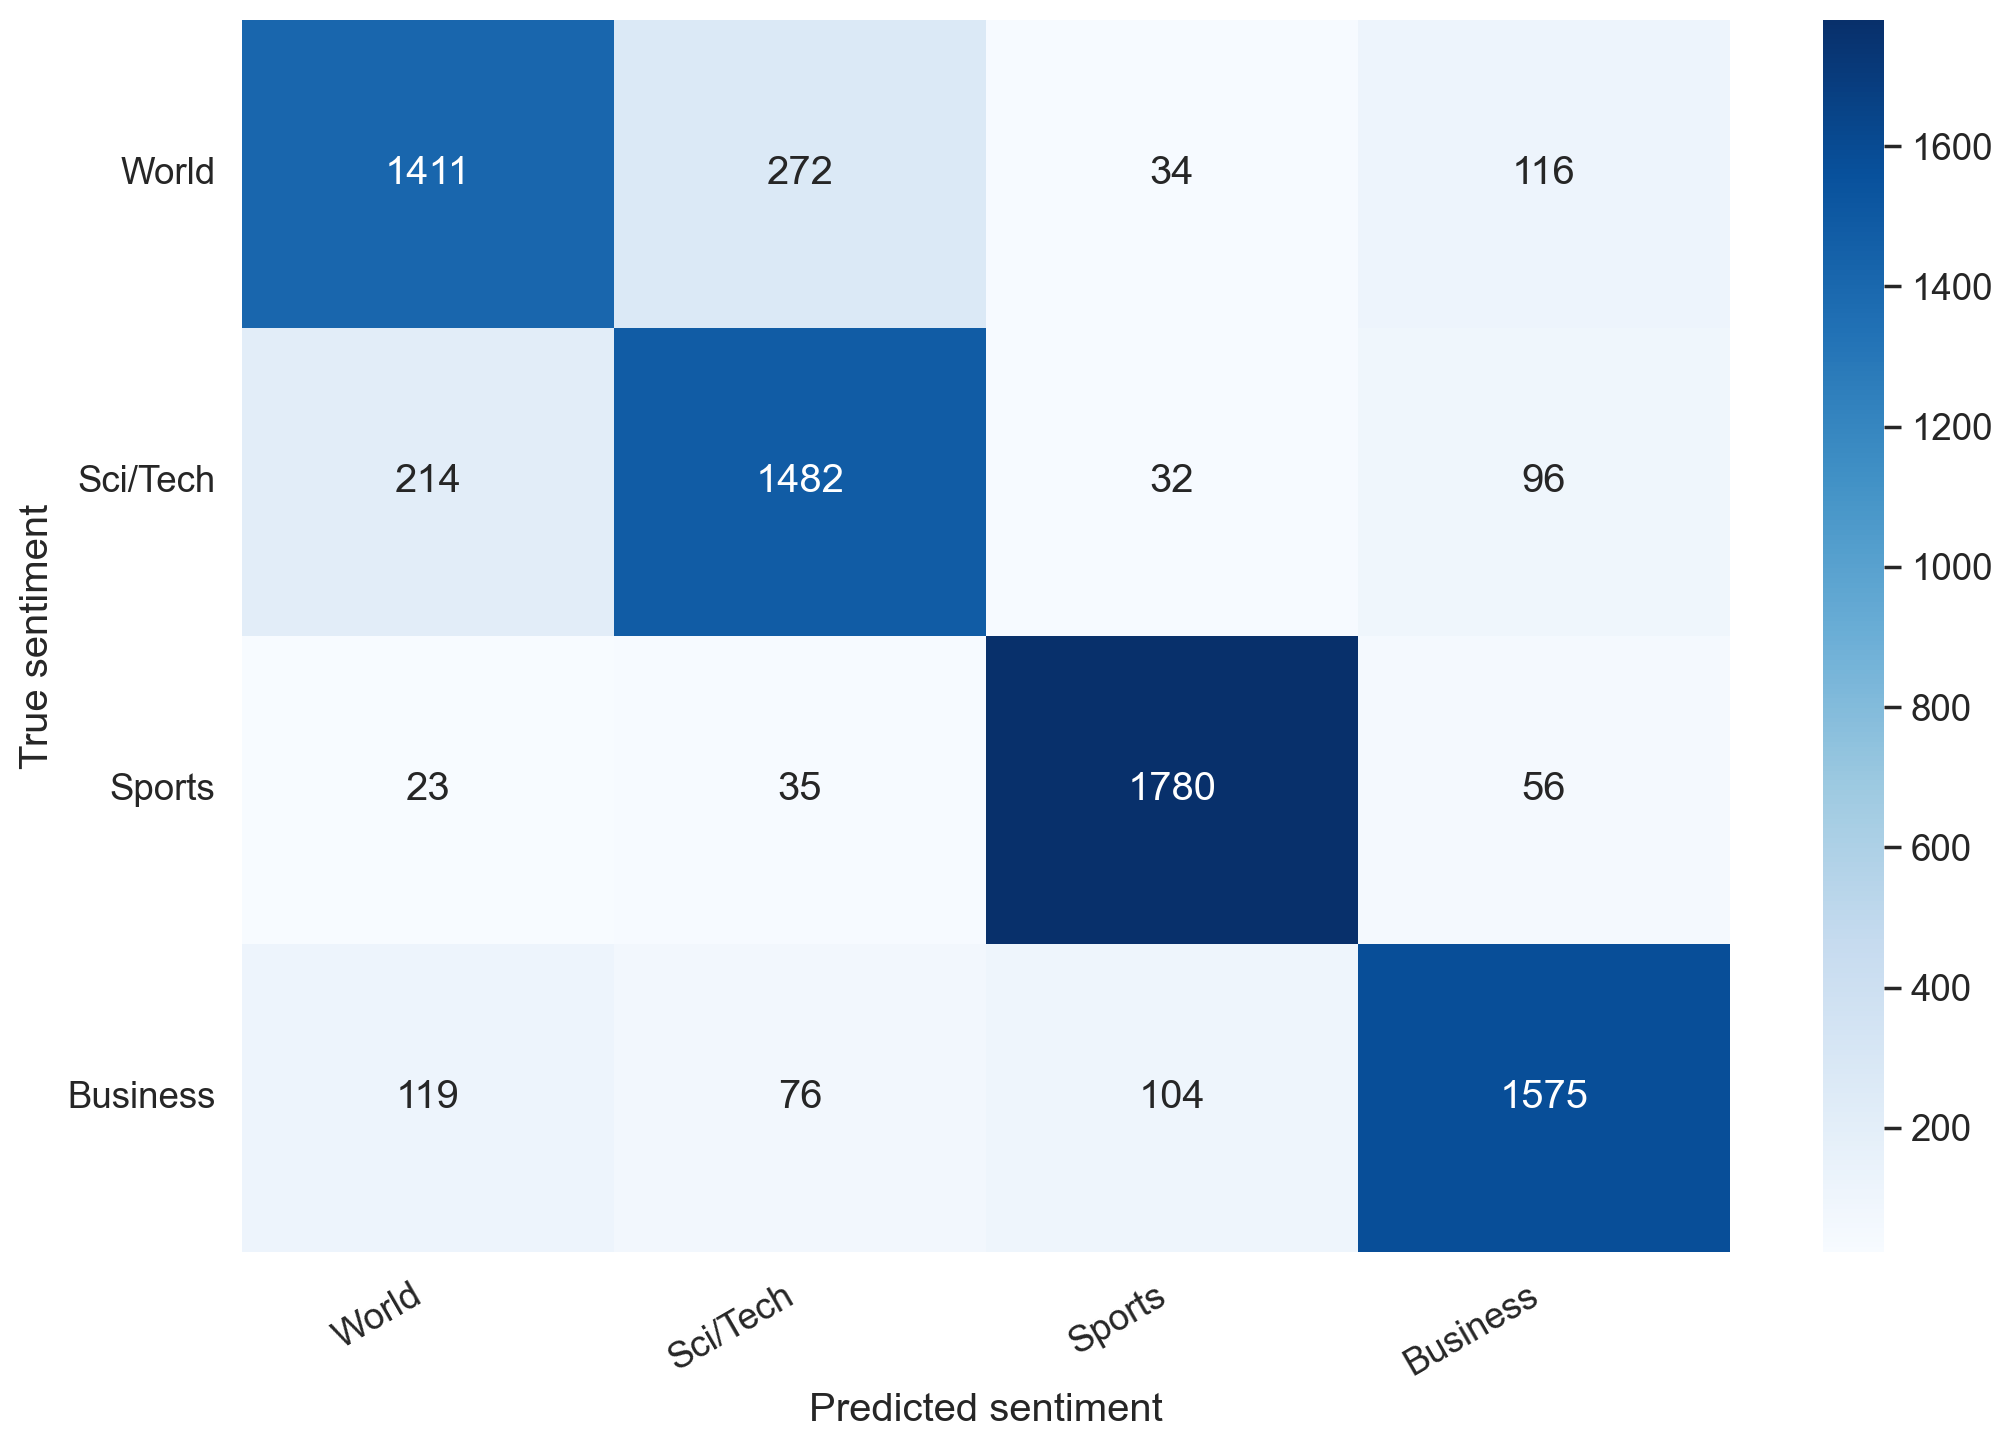

In [31]:
import pandas as pd
cm = confusion_matrix(df_pandas_predict_bert[col_categoria], df_pandas_predict_bert.result)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

Pruebas de predicción

In [32]:
light_model.annotate(
    "The new iphone is more powerfull than the older one"
)["class"]

['Sci/Tech']

In [33]:
light_model.annotate(
    "Two new match will be seen at Virginia"
)["class"]

['Sports']

Enlaces relacionados bibliografía organizada en formato markdown:

- [Annotators SparkNLP](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/5.Text_Classification_with_ClassifierDL.ipynb)
- [Opciones de preprocesado](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/2.Text_Preprocessing_with_SparkNLP_Annotators_Transformers.ipynb)
- [Clasificación de texto en Spark NLP con Bert y Universal Sentence Encoders](https://towardsdatascience.com/text-classification-in-spark-nlp-with-bert-and-universal-sentence-encoders-e644d618ca32)
- [Cómo instalar Spark NLP offline](https://nlp.johnsnowlabs.com/docs/en/install#offline)
- [Predicción de reseñas de películas con Bert en TF Hub (Python)](https://colab.research.google.com/github/google-research/bert/blob/master/predicting_movie_reviews_with_bert_on_tf_hub.ipynb#scrollTo=OjwJ4bTeWXD8)
- [Ajuste fino de Bert con Cloud TPUs (Python)](https://colab.research.google.com/github/tensorflow/tpu/blob/master/tools/colab/bert_finetuning_with_cloud_tpus.ipynb)
- [Repositorio de Bert en GitHub](https://github.com/google-research/bert)
- [Ventajas de Spark NLP vs Spacy](https://towardsdatascience.com/introduction-to-spark-nlp-foundations-and-basic-components-part-i-c83b7629ed59)
- [Explicación de Bert en diapositivas](http://web.stanford.edu/class/cs224n/slides/Jacob_Devlin_BERT.pdf)
- [Información sobre la disponibilidad de GPU en Colab](https://research.google.com/colaboratory/faq.html#gpu-availability)
- [Configuracion de spark NLP](https://github.com/JohnSnowLabs/spark-nlp/blob/master/README.md#quick-start)

In [34]:
if 'dbutils' in globals():
    print('borrando lo que hay en el directorio remoto para liberar espacio')
    # dbutils.fs.rm(root_folder,recurse=True)
elif platform.system() == 'Linux':
    from google.colab import runtime
    runtime.unassign()